In [140]:
import pandas as pd
import numpy as np
from keras.layers import Conv2D, Input, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam, RMSprop

import matplotlib.pyplot as plt

In [38]:
train_file_name = 'data/fashion-mnist_train.csv'
test_file_name = 'data/fashion-mnist_test.csv'

In [124]:
train_data = pd.read_csv(train_file_name)

In [132]:
# 785 columns, the first column is label, the rest is pixels
print(train_data.shape)

(60000, 785)


In [133]:
train_x = np.asarray(train_data.iloc[:,1:785])
print(train_x.shape)

(60000, 784)


In [134]:
train_y = np.asarray(train_data['label'])
print(train_y.shape)

(60000,)


In [135]:
train_x = np.reshape(train_x, (-1, 28, 28, 1))/255.0
print(type(train_x))
print(train_x.shape)

<class 'numpy.ndarray'>
(60000, 28, 28, 1)


In [129]:
# train_x = np.random.shuffle(train_x)
# print(type(train_x))

In [131]:
print(type(train_x))

<class 'NoneType'>


## Model

data_format: A string, one of `"channels_last"` or `"channels_first"`. The ordering of the dimensions in the inputs. `"channels_last"` corresponds to inputs with shape `(batch, height, width, channels)` while `"channels_first"` corresponds to inputs with shape `(batch, channels, height, width)`. It defaults to the `image_data_format` value found in your Keras config file at `~/.keras/keras.json`. If you never set it, then it will be `"channels_last"`.

In [152]:
input_ = Input(shape=(28, 28, 1,))

x = Conv2D(36, 3, padding='same')(input_)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Dropout(0.2)(x)

x = Conv2D(48, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Dropout(0.2)(x)

x = Conv2D(60, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(200, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=input_, outputs=x)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 28, 28, 36)        360       
_________________________________________________________________
batch_normalization_70 (Batc (None, 28, 28, 36)        144       
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 36)        0         
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 14, 14, 36)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 14, 14, 36)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 14, 14, 48)        15600     
__________

In [153]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

In [154]:
epochs= 20
batch_size = 256
r = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 235s 4ms/step - loss: 1.1912 - acc: 0.6851 - val_loss: 0.4478 - val_acc: 0.8318
Epoch 2/20
54000/54000 [==============================] - 266s 5ms/step - loss: 0.4455 - acc: 0.8382 - val_loss: 0.4353 - val_acc: 0.8373
Epoch 3/20
54000/54000 [==============================] - 315s 6ms/step - loss: 0.3806 - acc: 0.8615 - val_loss: 0.4852 - val_acc: 0.8235
Epoch 4/20
54000/54000 [==============================] - 305s 6ms/step - loss: 0.3474 - acc: 0.8744 - val_loss: 0.6238 - val_acc: 0.7635
Epoch 5/20
54000/54000 [==============================] - 267s 5ms/step - loss: 0.3226 - acc: 0.8830 - val_loss: 0.3457 - val_acc: 0.8643
Epoch 6/20
54000/54000 [==============================] - 267s 5ms/step - loss: 0.3118 - acc: 0.8879 - val_loss: 0.3885 - val_acc: 0.8413
Epoch 7/20
54000/54000 [==============================] - 265s 5ms/step - loss: 0.2979 - acc: 0.8907 - val_loss: 0.3416 - v

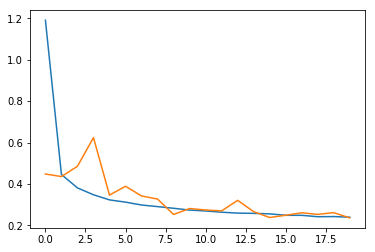

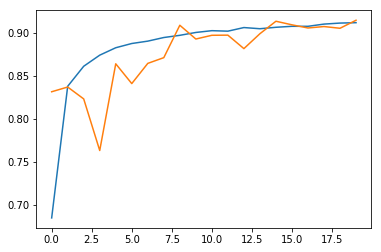

In [155]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.show()

plt.plot(r.history['acc'])
plt.plot(r.history['val_acc'])
plt.show()